## Support Vector Machine - Handwritten Digit Recognition

### Importing Libraries and Load_Digits Dataset:

In [2]:
import numpy as np
from sklearn.datasets import load_digits

In [3]:
digit_dataset = load_digits(as_frame=True)
X = digit_dataset.data
Y = digit_dataset.target
images = digit_dataset.images

### Description of the Dataset:

In [4]:
print(digit_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### For more information about the Load_Digits Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [4]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [6]:
X.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


### Normalization of pixel values to the range 0-1: 

In [7]:
X1= X/16
X1.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.00000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.01899,0.325299,0.739740,0.740505,0.361366,0.085142,0.008104,0.000348,0.124617,...,0.232819,0.012903,0.000035,0.017460,0.347350,0.755565,0.738070,0.422753,0.129243,0.022781
std,0.0,0.05670,0.297177,0.265553,0.267962,0.354151,0.207861,0.064836,0.005889,0.199760,...,0.307463,0.061525,0.001474,0.058394,0.318939,0.273418,0.308372,0.368789,0.255659,0.116258
min,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.00000,0.062500,0.625000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687500,0.625000,0.000000,0.000000,0.000000
50%,0.0,0.00000,0.250000,0.812500,0.812500,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.250000,0.812500,0.875000,0.375000,0.000000,0.000000
75%,0.0,0.00000,0.562500,0.937500,0.937500,0.687500,0.000000,0.000000,0.000000,0.187500,...,0.437500,0.000000,0.000000,0.000000,0.625000,1.000000,1.000000,0.750000,0.125000,0.000000
max,0.0,0.50000,1.000000,1.000000,1.000000,1.000000,1.000000,0.937500,0.125000,1.000000,...,1.000000,0.812500,0.062500,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Y.describe()

count    1797.000000
mean        4.490818
std         2.865304
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: target, dtype: float64

### Data Visualization:

Here, we choose to visualize a random sample (say the 8th) out of the 1797 samples in the **load_digits** dataset

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

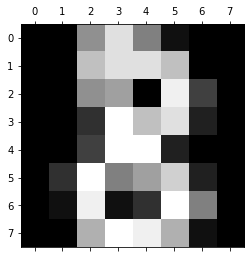

In [10]:
plt.gray()
plt.matshow(images[8])
plt.show()

In [11]:
images[8]

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

Here, the above matrix represents the pixel values of the image in a 8x8 matrix where **0 represents Black and 16 represents White**

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

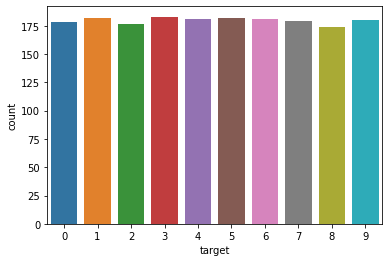

In [13]:
sns.countplot(data = Y, x = Y)

In [14]:
Y.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

Since there is slightly more number of 3's and less number of 8's than the average, we will use **Stratified Cross Validation** on the dataset later.

### Splitting Train and Test Datasets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


***Normalized Dataset:***

In [17]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state = 42, stratify = Y)
print(X1_train.shape, X1_test.shape)

(1437, 64) (360, 64)


### Training and Predicting on Linear Classifier:

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report

In [28]:
model = svm.SVC(kernel='linear')

In [29]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred, digits = 5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        36
           1    0.91892   0.94444   0.93151        36
           2    1.00000   1.00000   1.00000        35
           3    1.00000   0.97297   0.98630        37
           4    1.00000   1.00000   1.00000        36
           5    1.00000   1.00000   1.00000        37
           6    1.00000   0.97222   0.98592        36
           7    0.97297   1.00000   0.98630        36
           8    0.93939   0.88571   0.91176        35
           9    0.94737   1.00000   0.97297        36

    accuracy                        0.97778       360
   macro avg    0.97787   0.97754   0.97748       360
weighted avg    0.97803   0.97778   0.97768       360



In [30]:
model.fit(X1_train,Y_train)
Y1_pred = model.predict(X1_test)
print(classification_report(Y_test, Y1_pred, digits = 5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        36
           1    0.94444   0.94444   0.94444        36
           2    1.00000   1.00000   1.00000        35
           3    1.00000   1.00000   1.00000        37
           4    0.97297   1.00000   0.98630        36
           5    1.00000   1.00000   1.00000        37
           6    1.00000   0.97222   0.98592        36
           7    0.97297   1.00000   0.98630        36
           8    0.96970   0.91429   0.94118        35
           9    0.97297   1.00000   0.98630        36

    accuracy                        0.98333       360
   macro avg    0.98331   0.98310   0.98304       360
weighted avg    0.98339   0.98333   0.98321       360



#### *Here Normalized dataset gives 98.3% accuracy as opposed to standard dataset giving 97.7% accuracy*

### Using GridSearchCV for HyperParameter Tuning:

We will use the normalized dataset for further purposes

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [35]:
grid.fit(X1_train,Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.610 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.983 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.990 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.990 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.979 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.101 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.910 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.937 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.906 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.916 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.962 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.944 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.937 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.101 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.101 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.185 total time=   0.0s
[CV 4/5] END ......C=1, gamm

[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.944 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.934 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.934 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.944 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.913 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.580 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.589 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.533 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.582 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.101 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.101 total time=   0.0s
[CV 3/5] END ...C=10, gamma=

[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.979 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.115 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.111 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.132 total time=   0.1s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.108 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.129 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.990 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 1/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [38]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [39]:
grid_pred = grid.predict(X1_test)
print(classification_report(Y_test, grid_pred, digits = 5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        36
           1    0.97297   1.00000   0.98630        36
           2    1.00000   1.00000   1.00000        35
           3    1.00000   1.00000   1.00000        37
           4    1.00000   1.00000   1.00000        36
           5    1.00000   1.00000   1.00000        37
           6    1.00000   1.00000   1.00000        36
           7    0.97297   1.00000   0.98630        36
           8    1.00000   0.97143   0.98551        35
           9    1.00000   0.97222   0.98592        36

    accuracy                        0.99444       360
   macro avg    0.99459   0.99437   0.99440       360
weighted avg    0.99459   0.99444   0.99444       360



### *Here Tuned Parameters give 99.4% accuracy as opposed to Standard Parameters giving 98.3% accuracy*